In [11]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import patsy
import statsmodels.api as sm

from scipy.stats import pearsonr, norm, ttest_ind
from sklearn import decomposition

In [12]:
df = pd.read_csv('ride_weather_data.csv')

In [13]:
df.head()

,Unnamed: 0,datetime,Count,description,temperature,wind speed,humidity
0,0,2014-05-01 00:00:00,348,moderate rain,51.0548,4,95.0
1,1,2014-05-01 01:00:00,179,moderate rain,52.8602,5,94.0
2,2,2014-05-01 02:00:00,101,moderate rain,52.5272,5,95.0
3,3,2014-05-01 03:00:00,172,heavy intensity rain,54.5099,5,94.0
4,4,2014-05-01 04:00:00,241,heavy intensity rain,53.4050,4,94.0


In [14]:
df = df[['datetime','Count','description','temperature','wind speed','humidity']]
df['wind_speed'] = df['wind speed']
df = df[['datetime','Count','description','temperature','wind_speed','humidity']]

In [15]:
df.head()

,datetime,Count,description,temperature,wind_speed,humidity
0,2014-05-01 00:00:00,348,moderate rain,51.0548,4,95.0
1,2014-05-01 01:00:00,179,moderate rain,52.8602,5,94.0
2,2014-05-01 02:00:00,101,moderate rain,52.5272,5,95.0
3,2014-05-01 03:00:00,172,heavy intensity rain,54.5099,5,94.0
4,2014-05-01 04:00:00,241,heavy intensity rain,53.4050,4,94.0


In [16]:
df['temp_diff'] = np.absolute(df['temperature'] - 62.283923)
df.head()

,datetime,Count,description,temperature,wind_speed,humidity,temp_diff
0,2014-05-01 00:00:00,348,moderate rain,51.0548,4,95.0,11.229123
1,2014-05-01 01:00:00,179,moderate rain,52.8602,5,94.0,9.423723
2,2014-05-01 02:00:00,101,moderate rain,52.5272,5,95.0,9.756723
3,2014-05-01 03:00:00,172,heavy intensity rain,54.5099,5,94.0,7.774023
4,2014-05-01 04:00:00,241,heavy intensity rain,53.4050,4,94.0,8.878923


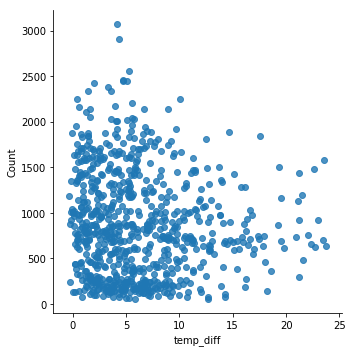

In [17]:
sns.lmplot(x='temp_diff', y='Count', data=df, fit_reg=False, x_jitter=.5, y_jitter=.5)

In [18]:
desc = df.describe()
print(desc)

             Count  temperature  wind_speed    humidity   temp_diff
count   744.000000   744.000000  744.000000  742.000000  744.000000
mean    876.928763    62.283923    2.138441   65.951482    6.209411
std     569.126758     7.890543    1.933880   22.689961    4.863332
min      52.000000    46.292000    0.000000   18.000000    0.028077
25%     397.500000    56.543000    1.000000   47.000000    2.435577
50%     789.000000    61.223000    2.000000   64.000000    5.103000
75%    1275.500000    66.753500    3.000000   91.000000    8.690039
max    3076.000000    86.162000   12.000000  100.000000   23.878077


In [19]:
corrs = df.corr()
print(corrs)

                Count  temperature  wind_speed  humidity  temp_diff
Count        1.000000     0.200969   -0.010154  0.022967  -0.089023
temperature  0.200969     1.000000    0.166224 -0.399673   0.328004
wind_speed  -0.010154     0.166224    1.000000 -0.233347   0.173342
humidity     0.022967    -0.399673   -0.233347  1.000000  -0.355033
temp_diff   -0.089023     0.328004    0.173342 -0.355033   1.000000


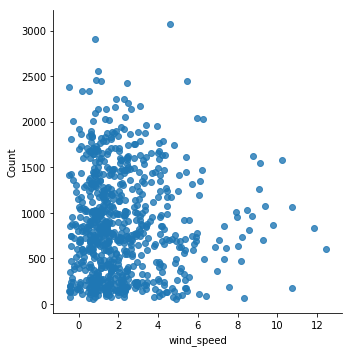

In [20]:
# scatterplot for wind speed and ride counts 
sns.lmplot(x='wind_speed', y='Count', data=df, fit_reg=False, x_jitter=.5, y_jitter=.5)

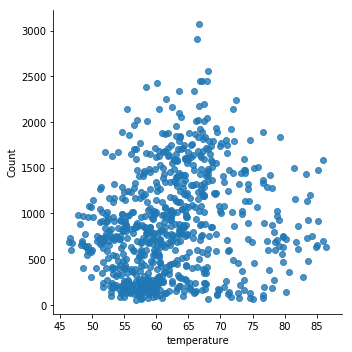

In [21]:
#scatterplot for temperature and ride counts 
sns.lmplot(x='temperature', y='Count', data=df, fit_reg=False, x_jitter=.5, y_jitter=.5)

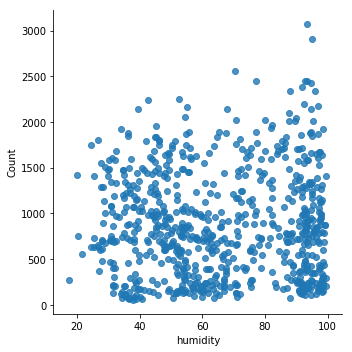

In [22]:
#scatterplot for humidity and ride counts
sns.lmplot(x='humidity', y='Count', data=df, fit_reg=False, x_jitter=.5, y_jitter=.5)

In [23]:
#Range for humidity 
print("Highest humidity is",df['humidity'].max(),"and lowest humidity is",df['humidity'].min())
#Range for temperature 
print("Highest temperature is",df['temperature'].max(),"and lowest temperature is",df['temperature'].min())

Highest humidity is 100.0 and lowest humidity is 18.0
Highest temperature is 86.162 and lowest temperature is 46.292


In [45]:
outcome, predictors = patsy.dmatrices('Count ~ temp_diff + humidity + wind_speed', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.207
Date:                Thu, 06 Jun 2019   Prob (F-statistic):             0.0859
Time:                        15:52:57   Log-Likelihood:                -5756.9
No. Observations:                 742   AIC:                         1.152e+04
Df Residuals:                     738   BIC:                         1.154e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    961.7449     88.792     10.831      0.0

In [43]:
outcome, predictors = patsy.dmatrices('Count ~ temp_diff', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.927
Date:                Thu, 06 Jun 2019   Prob (F-statistic):             0.0151
Time:                        15:51:33   Log-Likelihood:                -5772.2
No. Observations:                 744   AIC:                         1.155e+04
Df Residuals:                     742   BIC:                         1.156e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    941.6172     33.741     27.907      0.0

In [25]:
outcome, predictors = patsy.dmatrices('Count ~ wind_speed', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.07651
Date:                Thu, 06 Jun 2019   Prob (F-statistic):              0.782
Time:                        15:37:55   Log-Likelihood:                -5775.2
No. Observations:                 744   AIC:                         1.155e+04
Df Residuals:                     742   BIC:                         1.156e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    883.3190     31.139     28.367      0.0

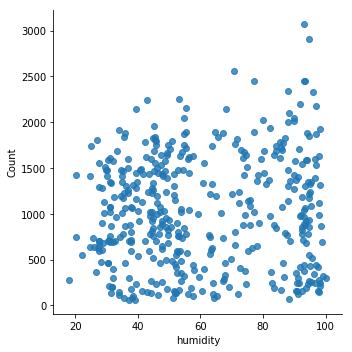

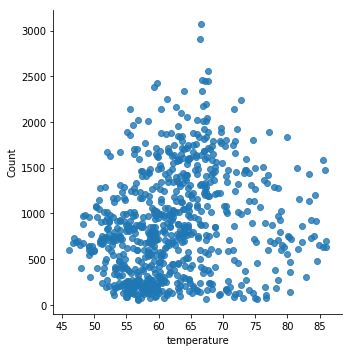

In [26]:
# weather condition combination to ride counts 
# Comfort level according to National Weather services 
# humidity >= 65 - oppressive air condition, lots of moisture in the air 
# 55 > humidity >65 - sticky and muggy https://www.weather.gov/arx/why_dewpoint_vs_humidity
# 87 degrees - too hot in NY https://weather.com/news/news/how-hot-is-too-hot-survey

df_warm = df[df['humidity'] >= 65]
df_warm = df[df['temperature'] > 60]
df_warm.head()
sns.lmplot(x='humidity', y='Count', data=df_warm, fit_reg=False, x_jitter=.5, y_jitter=.5)
sns.lmplot(x='temperature', y='Count', data=df, fit_reg=False, x_jitter=.5, y_jitter=.5)



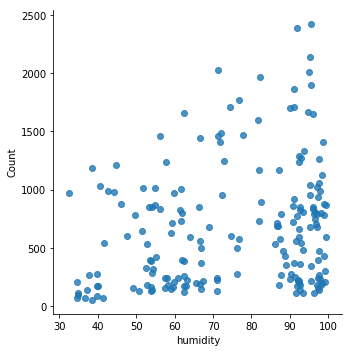

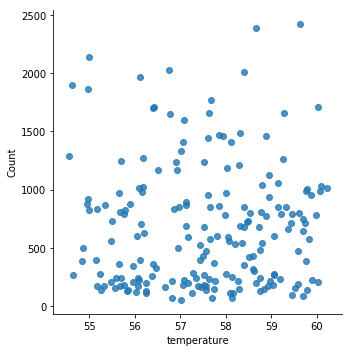

In [27]:
df_cooler = df[df['humidity'] < 65]
df_cooler = df[df['temperature'] < 60]
df_cooler = df_cooler[df_cooler['temperature']> 55]
df_cooler.head()
sns.lmplot(x='humidity', y='Count', data=df_cooler, fit_reg=False, x_jitter=.5, y_jitter=.5)
sns.lmplot(x='temperature', y='Count', data=df_cooler, fit_reg=False, x_jitter=.5, y_jitter=.5)

In [28]:
df['description'].value_counts()

light rain                      149
sky is clear                    120
broken clouds                   106
mist                            104
scattered clouds                 65
overcast clouds                  61
few clouds                       43
heavy intensity rain             27
haze                             24
moderate rain                    19
fog                              11
light intensity drizzle          10
thunderstorm                      2
very heavy rain                   1
thunderstorm with heavy rain      1
heavy intensity drizzle           1
Name: description, dtype: int64

In [42]:
df_rainydays = df[df['description'] == "heavy intensity rain"]
df_rainydays['Count'].mean()
#sns.lmplot(x='wind_speed', y='Count', data=df, fit_reg=False, x_jitter=.5, y_jitter=.5)

961.44444444444446

In [41]:
df_cleardays = df[df['description'] == "sky is clear"]
df_cleardays['Count'].mean()
#sns.lmplot(x='wind_speed', y='Count', data=df, fit_reg=False, x_jitter=.5, y_jitter=.5)

760.10000000000002